
<span style="font-size: 18pt;"><b>Maryam Afshari</b></span>



## Motivation and Method

My Google image query is "Iranian Women". I am going to use Emotion Recognition methods to analyze the emotions depicted on the faces in the resulting images of this query. As an Iranian, I've often encountered misconceptions about Iranian women in international contexts, particularly the belief that Iranian women are depressed and sad. 

Back in Iran, I worked as a tour guide for international people visiting Iran and I was shocked to hear from people: "ah, we think you never laugh" or to see they would make photos of a group of Iranian women while taking a happy selfie (with smile) because they find it so strange that they can smile!

However, despite the negative media coverage, real life in Iran paints a different picture. In spite of social challenges and inequalities, Iranian women remain socially active and strive to make the best out of their circumstances. 

It's important to note that the rules suppressing women in Iran are relatively new, emerging in the past 40 years after Iran's revolution. Previous generations of women experienced a different reality, and the current generation received education from women who lived in a more equal society. Thus, the government's attempts to suppress them have not been entirely successful.

The frequency with which I encounter the stereotype of depressed Iranian women motivates me to conduct "emotion recognition" on Google image search results of Iranian women.

**Hypothesis:**

People form these stereotypes about other groups based on negative media coverage. Therefore, I believe that the emotion of 'sadness' will occur most in pictures of Iranian women.

**Steps taken:**

1. Downloading 100 images using google_images_download (the code is commented out but still in the notebook).
2. Emotion recognition for a single image.
3. Reading images into a dataframe.
4. Emotion recognition for all images in the dataframe.
5. Results and visualization.
6. Conclusion and discussion.


## Downloading images

In [1]:
#!pip install git+https://github.com/Joeclinton1/google-images-download.git

In [2]:
# from google_images_download import google_images_download #importing the library

# response = google_images_download.googleimagesdownload() #class instantiation

# arguments = {"keywords":"Iranian Women","limit":100,"print_urls":True} #creating list of arguments 
# paths = response.download(arguments) #passing the arguments to the function
# #print(paths)

## Emotion recognition for a single image

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import glob 
from tqdm import tqdm 
import os
import cv2
from tqdm.notebook import tqdm

In [2]:
# define a function to download image from path
import urllib

import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing import image

%config InlineBackend.figure_format='retina' 

def load_image_from_url(url, target_size=None, color_mode='rgb'):
    assert color_mode in ('grayscale', 'rgb'), 'color_mode must be "grayscale" or "rgb"'
    response = urllib.request.urlopen(url)
    img = Image.open(io.BytesIO(response.read()))
    img = img.convert('RGB')
    if color_mode == 'grayscale':
        img = ImageOps.grayscale(img)
    if target_size:
        img = img.resize(target_size, Image.NEAREST) # resize
    return image.img_to_array(img)

def load_image_from_path(image_path, target_size=None, color_mode='rgb'):
    pil_image = image.load_img(image_path, 
                               target_size=target_size,
                            color_mode=color_mode)
    return image.img_to_array(pil_image)

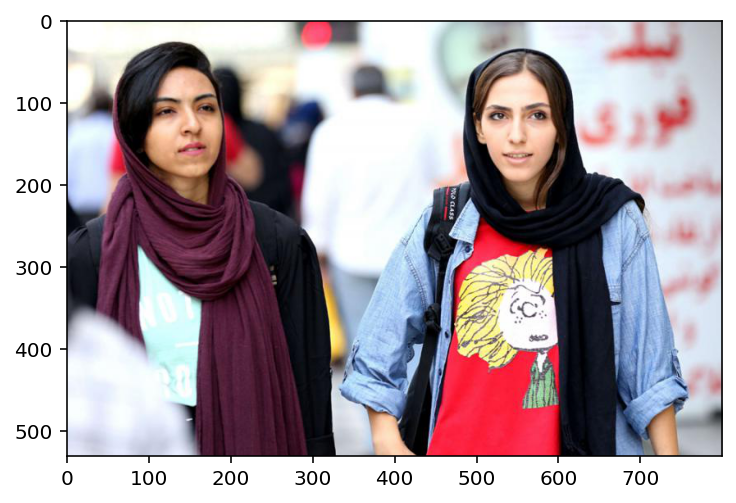

In [3]:
OUR_IMAGE = 'downloads/Iranian Women/4.iran_women_afp.jpg'
color_image = load_image_from_path(OUR_IMAGE, target_size=None, color_mode='rgb')

plt.imshow(color_image.astype(np.uint8))

In [4]:
import warnings
warnings.filterwarnings("ignore")

def apply_offsets(face_coordinates, offsets):
    """
    Derived from https://github.com/oarriaga/face_classification/blob/
    b861d21b0e76ca5514cdeb5b56a689b7318584f4/src/utils/inference.py#L21
    """
    x, y, width, height = face_coordinates
    x_off, y_off = offsets
    return (x - x_off, x + width + x_off, y - y_off, y + height + y_off)

from tensorflow.keras.models import load_model
!wget https://github.com/oarriaga/face_classification/raw/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5 

face_classification = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # load the classifier only once!
emotion_classifier = load_model('fer2013_mini_XCEPTION.102-0.66.hdf5') # load this only once! (not in a loop)

EMOTION_OFFSETS = (0, 0)
INPUT_SHAPE_EMOTION = emotion_classifier.input_shape[1:3]

labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
pre_image = load_image_from_path(OUR_IMAGE, color_mode='grayscale') # load our one image
gray_image = np.squeeze(pre_image).astype('uint8')  
faces = face_classification.detectMultiScale(gray_image, 1.3, 5)  

for face_coordinates in faces:
    x1, x2, y1, y2 = apply_offsets(face_coordinates, EMOTION_OFFSETS) 
    face_img = gray_image[y1:y2, x1:x2] # only get the face
    face_img = cv2.resize(face_img, (INPUT_SHAPE_EMOTION))
    face_img = face_img.astype('float32') / 255.0  # pre-processing 
    face_img = face_img - 0.5 # pre-processing specific to the emotion classifier
    face_img = face_img * 2.0 # pre-processing specific to the emotion classifier
    face_img = np.expand_dims(face_img, 0) # batch of one
    face_img = np.expand_dims(face_img, -1) # pre-processing specific to the emotion classifier
    probas = emotion_classifier.predict(face_img)
    label = labels[np.argmax(probas[0])]
    emotionprobas = dict(zip(labels, probas[0])) # make a dictionary from the labels and the probabilities
    print('This person looks {}'.format(label))
    print(emotionprobas)

--2022-01-15 17:55:51--  https://github.com/oarriaga/face_classification/raw/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oarriaga/face_classification/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5 [following]
--2022-01-15 17:55:51--  https://raw.githubusercontent.com/oarriaga/face_classification/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 872856 (852K) [application/octet-stream]
Saving to: 'fer2013_mini_XCEPTION.102-0.

This person looks sad
{'angry': 0.10057752, 'disgust': 0.0010057039, 'fear': 0.06960143, 'happy': 0.011538421, 'sad': 0.41001052, 'surprise': 0.0007208062, 'neutral': 0.40654558}
This person looks neutral
{'angry': 0.003387346, 'disgust': 5.0774484e-05, 'fear': 0.022484548, 'happy': 0.3110043, 'sad': 0.0061138226, 'surprise': 0.012389601, 'neutral': 0.6445696}


## Emotion recongnition for all images

In [5]:
# read  all images in the a data frame
images = glob.glob("downloads/Iranian Women/*.jpg")
df = pd.DataFrame({"image":images})
df

,image
0,downloads/Iranian Women\1.50775861_303.jpg
1,downloads/Iranian Women\10.4862182723_979fcc70...
2,downloads/Iranian Women\11.15145303275a45e6174...
3,downloads/Iranian Women\13.edited-iranian-wome...
4,downloads/Iranian Women\15.000_1p62wb.jpg
...,...
73,downloads/Iranian Women\94.10iran-foot1.jpg
74,downloads/Iranian Women\95.f36fed9e-6ccc-11e9-...
75,downloads/Iranian Women\96._63013652_students.jpg
76,downloads/Iranian Women\97.89fe1063-df8c-4f20-...


In [6]:
# Estimating the emotion of the faces in the images

from tensorflow.keras.models import load_model
#!wget https://github.com/oarriaga/face_classification/raw/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5      
face_classification = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # load the classifier only once!

emotion_classifier = load_model('fer2013_mini_XCEPTION.102-0.66.hdf5') # load this only once! (not in a loop)

EMOTION_OFFSETS = (0, 0)
INPUT_SHAPE_EMOTION = emotion_classifier.input_shape[1:3]

labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
emotions = []
name_file = []
n_faces = []
for file in tqdm(df.image):
    pre_image = load_image_from_path(file, color_mode='grayscale') # same method as one image
    gray_image = np.squeeze(pre_image).astype('uint8')  # same method as one image
    faces = face_classification.detectMultiScale(gray_image, 1.3, 5)  # same method as one image

    for face_coordinates in faces:
        name_file.append(file)
        x1, x2, y1, y2 = apply_offsets(face_coordinates, EMOTION_OFFSETS) 
        face_img = gray_image[y1:y2, x1:x2] # only get the face
        face_img = cv2.resize(face_img, (INPUT_SHAPE_EMOTION))
        face_img = face_img.astype('float32') / 255.0 # pre-processing 
        face_img = face_img - 0.5 # pre-processing specific to the emotion classifier
        face_img = face_img * 2.0 # pre-processing specific to the emotion classifier
        face_img = np.expand_dims(face_img, 0) # batch of one
        face_img = np.expand_dims(face_img, -1) # pre-processing specific to the emotion classifier
        probas = emotion_classifier.predict(face_img)
        #emotionprobas = dict(zip(labels, probas[0])) # make a dictionary from the labels and the probabilities
        emotion_label =  labels[np.argmax(probas[0])], probas[0][np.argmax(probas[0])]
        emotions.append(emotion_label)
        n_faces.append(len(faces))
        
df_new = pd.DataFrame([name_file,emotions]) 
df_new = pd.DataFrame(np.array([name_file,emotions]).T)
df_new[['emotion','emotion_probability']] = pd.DataFrame(df_new[1].tolist()) # separate the gender and its probability into different columns
df_new["n_faces"] = n_faces 
df_new


  0%|          | 0/78 [00:00<?, ?it/s]

,0,1,emotion,emotion_probability,n_faces
0,downloads/Iranian Women\1.50775861_303.jpg,"(neutral, 0.78179353)",neutral,0.781794,2
1,downloads/Iranian Women\1.50775861_303.jpg,"(happy, 0.9919126)",happy,0.991913,2
2,downloads/Iranian Women\10.4862182723_979fcc70...,"(happy, 0.7422451)",happy,0.742245,3
3,downloads/Iranian Women\10.4862182723_979fcc70...,"(happy, 0.9739174)",happy,0.973917,3
4,downloads/Iranian Women\10.4862182723_979fcc70...,"(happy, 0.94274384)",happy,0.942744,3
...,...,...,...,...,...
206,downloads/Iranian Women\97.89fe1063-df8c-4f20-...,"(neutral, 0.54767096)",neutral,0.547671,1
207,downloads/Iranian Women\99.6yyg5cyy-1399943639...,"(sad, 0.3750703)",sad,0.375070,4
208,downloads/Iranian Women\99.6yyg5cyy-1399943639...,"(happy, 0.9036771)",happy,0.903677,4
209,downloads/Iranian Women\99.6yyg5cyy-1399943639...,"(neutral, 0.87980676)",neutral,0.879807,4


## Results

In [7]:
print('The total faces detected is: ',df_new['n_faces'].count())
df_new['n_faces'].value_counts()

The total faces detected is:  211


3     42
2     32
1     26
4     20
20    20
5     15
14    14
12    12
9      9
8      8
7      7
6      6
Name: n_faces, dtype: int64

In [8]:
print('The total emotions detected is: ',df_new['emotion'].count())
df_new['emotion'].value_counts()

The total emotions detected is:  211


happy       77
neutral     56
sad         39
angry       18
fear        17
surprise     4
Name: emotion, dtype: int64

## Visualization

Text(0.5, 1.02, 'Count of Each Emotion')

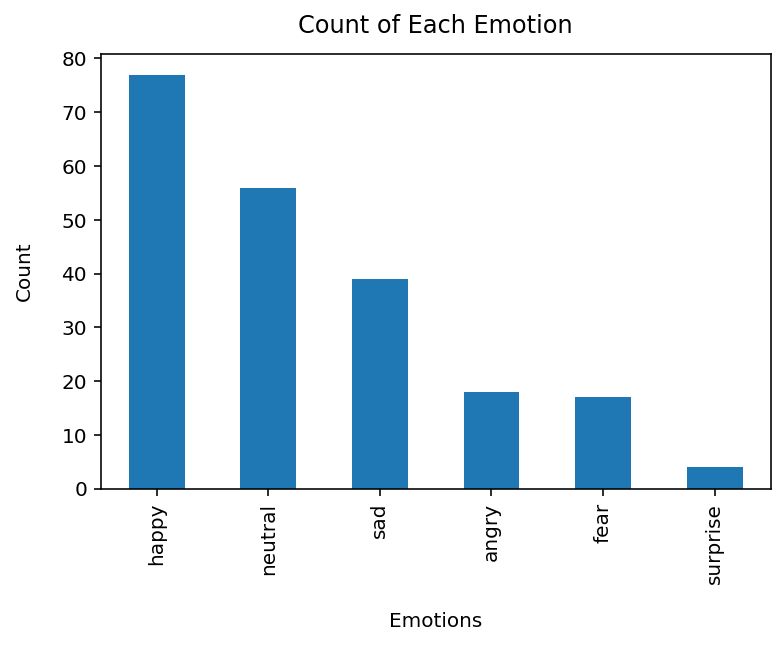

In [10]:
# number of occurance of happy faces (77 happy faces)
df_new['emotion'].value_counts().plot(kind="bar")
plt.xlabel("Emotions", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Count of Each Emotion", y=1.02)

Text(0.5, 1.02, 'Count of Faces')

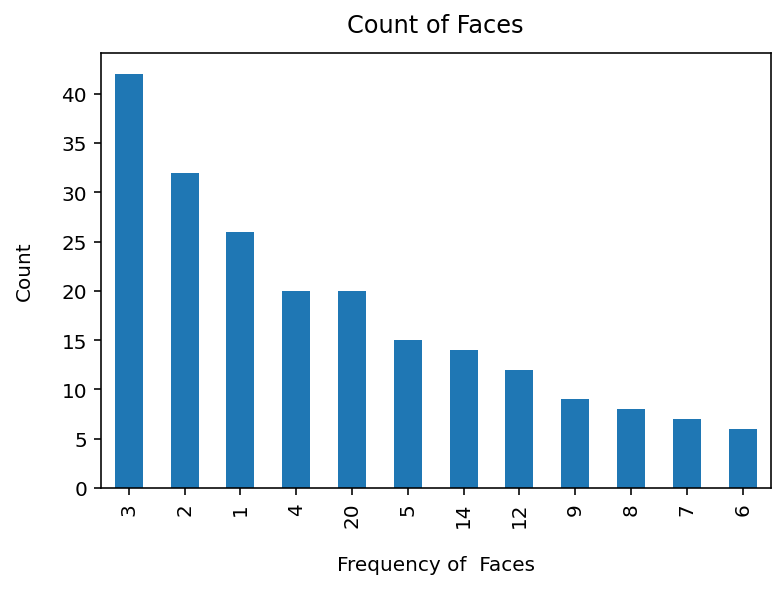

In [12]:
# number of occurance of happy faces (77 happy faces)
df_new['n_faces'].value_counts().plot(kind="bar")
plt.xlabel("Frequency of  Faces", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Count of Faces", y=1.02)

## Analysis of Emotion Recognition Results

The results of the emotion recognition on images of Iranian women are as follows:

- 77 happy faces
- 56 neutral faces
- 39 sad faces
- 18 angry faces
- 17 fearful faces
- 4 surprised faces
- 0 faces showing disgust

Out of the initial sample of 100 images, 78 images were used for analysis. Among these 78 images, a total of 211 faces were detected. Notably, only one image depicted women wearing face masks, indicating that the model's performance was not significantly affected by covered faces. Additionally, the wearing of burkas is uncommon in Iran, further supporting the model's accuracy in detecting facial expressions.

Contrary to my hypothesis, the most recognized emotion in the "Iranian Women" images is "happy," with a frequency of 77. Following "happy," the second most recognized emotion is "neutral" with a frequency of 56. Visual inspection of the images confirms these findings.

However, the presence of 39 "sad" faces in a sample of 78 images (out of 211 recognized faces) is noteworthy, comprising almost one-fourth of the detected faces. To contextualize this, a comparative analysis with images of women from other well-represented countries in media, such as Dutch women, could provide valuable insights.

Additionally, there are 18 faces showing "anger" and 17 showing "fear," while no faces display "surprise" or "disgust." It's worth noting that most photos are group photos, with single faces detected only 26 times. 

Furthermore, some images depict political activists with happy faces who are currently in prison. Websites providing these photos are often news agencies reporting on their misfortune. This raises questions about the portrayal of Iranian women in media and the biases in Google's recommendation algorithms. To gain a deeper understanding, complementary analyses such as sentiment analysis of text related to the query subject and comparative analyses with well-represented countries in media are recommended.
